# 분류기 만들기

## 타이타닉 데이터의 생존여부 분류
- 규칙: 성별(sex) = 1 생존하지 않은 것으로 분류

In [2]:
# 라이브러리 불러오기
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        return pred

## 타이타닉 데이터 가져오기

In [4]:

titanic_df = pd.read_csv('abc/data/titanic.csv')
X_titanic_df = titanic_df.drop('Survived', axis=1)
y_titanic_df = titanic_df['Survived']

In [5]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df) 
    df = drop_features(df)
    df = format_features(df)
    return df

In [6]:
X_titanic_df = transform_features(X_titanic_df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24028\2811512165.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24028\2811512165.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

# 데이터셋 분할

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,
                                                    y_titanic_df, 
                                                    test_size=0.2, 
                                                    random_state=0 )

In [8]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

In [9]:
my_pred = myclf.predict(X_test)
accuracy_score(y_test, my_pred)

0.7877094972067039

In [10]:
confusion_matrix(y_test, my_pred)


array([[92, 18],
       [20, 49]])

In [11]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, my_pred), recall_score(y_test, my_pred)

(np.float64(0.7313432835820896), np.float64(0.7101449275362319))

In [12]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print(confusion)
    print(accuracy, precision, recall)

# 로지스틱 회귀

In [13]:
# 로지스틱회귀 분륨모델 생성
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)  #수렴
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 정확도, 정밀도, 재현율
get_clf_eval(y_test, pred)

[[92 18]
 [16 53]]
0.8100558659217877 0.7464788732394366 0.7681159420289855


# random forest

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
  'KNN': KNeighborsClassifier(n_neighbors=5),
  'RF': RandomForestClassifier(),
  'LR': LogisticRegression(max_iter=3000)
}
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(f'{name} 모델의 정확도: {acc:.5f}')

KNN 모델의 정확도: 0.73743
RF 모델의 정확도: 0.81564
LR 모델의 정확도: 0.81006


In [15]:
pred_proba = lr_clf.predict_proba(X_test) #prova에 X_test를 넣었을 때 0일 확률, 1일 확률
pos_proba = pred_proba[:,1] # 양성클래스일 확률
threshold = 0.4 # 임계치
custom_proba = (pos_proba >= threshold).astype(int) # 임계치보다 크면 1로 넣는다.
confusion_matrix(y_test, custom_proba)

# 정확도, 정밀도, 재현율
get_clf_eval(y_test, custom_proba)

[[86 24]
 [13 56]]
0.7932960893854749 0.7 0.8115942028985508


In [16]:
pred_proba = lr_clf.predict_proba(X_test) #prova에 X_test를 넣었을 때 0일 확률, 1일 확률
pos_proba = pred_proba[:,1] # 양성클래스일 확률
threshold = 0.5 # 임계치
custom_proba = (pos_proba >= threshold).astype(int) # 임계치보다 크면 1로 넣는다.
confusion_matrix(y_test, custom_proba)

# 정확도, 정밀도, 재현율
get_clf_eval(y_test, custom_proba)

[[92 18]
 [16 53]]
0.8100558659217877 0.7464788732394366 0.7681159420289855


## 정밀도와 재현율의 변화
정밀도와 재현율의 불균형이 심할 때,   
혹은 비지니스의 요구사항이 있을 때   
임계치를 조정해야 한다.

임계치를 낮추면, 정밀도는 낮아지고, 재현율은 올라간다.

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

np.float64(0.7571428571428571)

In [ ]:
print(classification_report(y_test,pred)) # 평가보고서

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.75      0.77      0.76        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [21]:
pd.Series(lr_clf.coef_[0]).sort_values() #피처의 중요도는 계수

1   -2.595000
0   -0.900603
3   -0.368429
7   -0.107340
6   -0.059145
4   -0.059023
2   -0.042774
5    0.001287
dtype: float64

# 보팅분류기

In [22]:
# 라이브러리 불러오기
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_breast_cancer

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

In [23]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# 데이터 분할

In [26]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target, 
                                                    test_size=0.2, 
                                                    random_state=0 )

In [28]:
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=7)
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf)],
                          voting='soft')

In [29]:
# 분류기 학습 - 예측
vo_clf.fit(X_train, y_train)
vo_pred = vo_clf.predict(X_test)
accuracy_score(y_test, vo_pred)

0.956140350877193

In [30]:
confusion_matrix(y_test, vo_pred)

array([[44,  3],
       [ 2, 65]])

In [31]:
print(classification_report(y_test, vo_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [34]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    # 중복된 feature 이름 처리: 이름 뒤에 _0, _1, ... 등의 suffix 추가
    feature_dup_df = old_feature_name_df.groupby('column_name').cumcount()
    new_feature_name_df = old_feature_name_df.copy()
    new_feature_name_df['column_name'] = new_feature_name_df['column_name'] + "_" + feature_dup_df.astype(str)
    return new_feature_name_df

def get_human_dataset(base_path='abc/data/UCI-HAR_Dataset/'):
    # 피처 이름 로딩
    feature_path = base_path + 'features.txt'
    feature_name_df = pd.read_csv(feature_path, sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복 피처명 처리
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_names = new_feature_name_df['column_name'].tolist()

    # 학습/테스트 데이터 로딩
    X_train = pd.read_csv(base_path + 'train/X_train.txt', sep='\s+', names=feature_names)
    X_test = pd.read_csv(base_path + 'test/X_test.txt', sep='\s+', names=feature_names)

    y_train = pd.read_csv(base_path + 'train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv(base_path + 'test/y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

In [35]:
X_train, X_test, y_train, y_test = get_human_dataset()

print(X_train.shape, X_test.shape)
print(y_train['action'].value_counts())

(7352, 561) (2947, 561)
action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [60]:

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, rf_pred)

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9195792331184255

# GridSearchCV - 하이퍼파라미터 + 교차검증
## 랜덤포레스트 모델의 최적의 하이퍼파라미터 조합 찾기

In [61]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8,16,24, 32],
    'min_samples_split' : [2,8,16],
    'min_samples_leaf': [1,6,12]
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24, 32],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [62]:
grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2},
 np.float64(0.9164853101196953))

In [63]:
best_model = grid_cv.best_estimator_
best_pred = best_model.predict(X_test)
accuracy_score(y_test, best_pred)

0.9260264675941635

In [64]:
# 피처 중요도 출력
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, feature_names, top_n=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(10, top_n * 0.4))  # 피처 수에 따라 자동 높이 조절

    plt.barh(range(top_n), importances[indices][::-1], align='center')
    plt.yticks(range(top_n), np.array(feature_names)[indices][::-1])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Feature Importances')
    plt.tight_layout()
    plt.show()

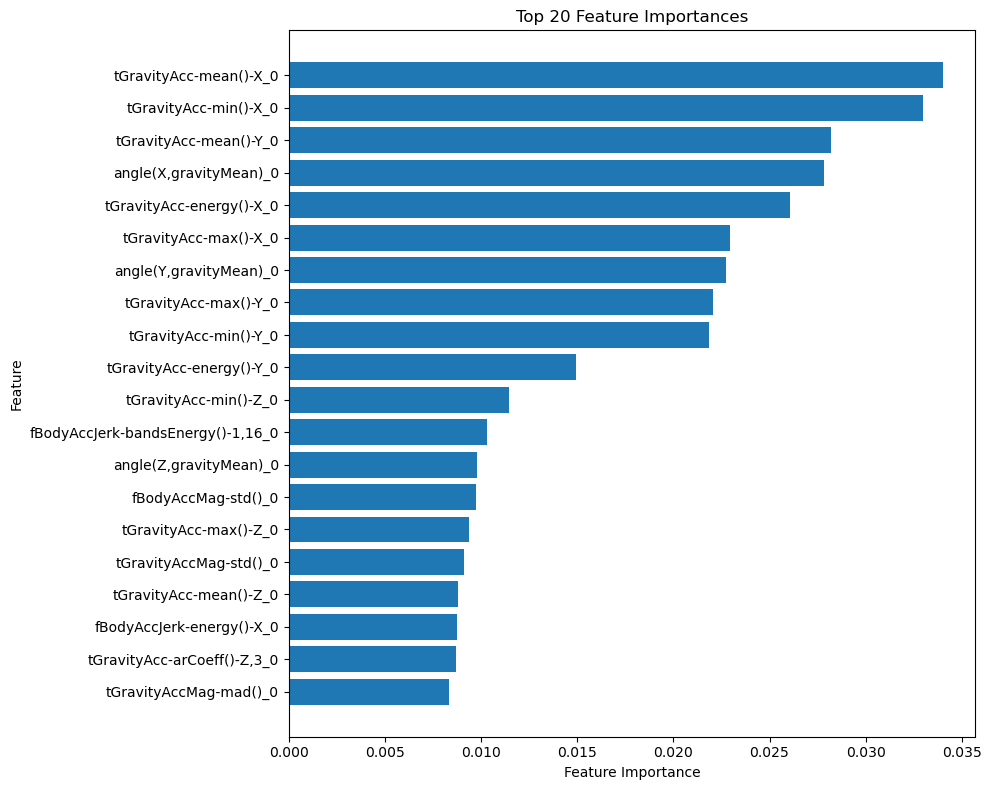

In [68]:
plot_feature_importances(grid_search.best_estimator_, feature_names=X_train.columns)


# GBM Gradient Boosting Macine

In [100]:
import os
os.chdir('C:\githome\hipython_rep')

In [101]:
import re
def clean_feature_name(name):
    # 특수문자 제거: 괄호, 콤마, 하이픈 등
    return re.sub('[^A-Za-z0-9_]+', '_', name)

In [110]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    # new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
    #   
    # 중복 이름 처리 + 특수문자 제거
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x: clean_feature_name(x[0] + ('_' + str(x[1]) if x[1] > 0 else '')), axis=1
    )
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [111]:
feature_name_df = pd.read_csv('abc/data/UCI-HAR_Dataset/features.txt', sep='\s+' ,
                              header=None, names=['column_index', 'column_name'])

new_feature_name_df = get_new_feature_name_df(feature_name_df)

X_train = pd.read_csv('abc/data/UCI-HAR_Dataset/train/X_train.txt')
X_test =  pd.read_csv('abc/data/UCI-HAR_Dataset/test/X_test.txt')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24028\3037849969.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: clean_feature_name(x[0] + ('_' + str(x[1]) if x[1] > 0 else '')), axis=1


In [114]:
import pandas as pd

def get_human_dataset( ):
  feature_name_df = pd.read_csv('abc/data/UCI-HAR_Dataset/features.txt',sep='\s+',
                        header=None, names=['column_index','column_name'])
  new_feature_name_df = get_new_feature_name_df(feature_name_df)
  feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
  X_train = pd.read_csv('abc/data/UCI-HAR_Dataset/train/X_train.txt',sep='\s+', names=feature_name )
  X_test = pd.read_csv('abc/data/UCI-HAR_Dataset/test/X_test.txt',sep='\s+', names=feature_name)
  y_train = pd.read_csv('abc/data/UCI-HAR_Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
  y_test = pd.read_csv('abc/data/UCI-HAR_Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
  return X_train, X_test, y_train, y_test
  

In [115]:
X_train, X_test, y_train, y_test = get_human_dataset()

print(X_train.shape, X_test.shape)
print(y_train['action'].value_counts())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24028\3037849969.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: clean_feature_name(x[0] + ('_' + str(x[1]) if x[1] > 0 else '')), axis=1


(7352, 561) (2947, 561)
action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [116]:

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
accuracy_score(y_test, gb_pred)

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9392602646759416

# XGBOOST

In [117]:
import xgboost
print(xgboost.__version__)

1.6.2


In [118]:
from sklearn.preprocessing import LabelEncoder
X_train, X_test, y_train, y_test = get_human_dataset()
X_train.shape, y_train.shape


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24028\3037849969.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: clean_feature_name(x[0] + ('_' + str(x[1]) if x[1] > 0 else '')), axis=1


((7352, 561), (7352, 1))

In [119]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Series → 1D array
y_test_encoded = le.transform(y_test)

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [120]:
from xgboost import XGBClassifier
evals = [(X_test, y_test_encoded)]
xgb = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, use_label_encoder=False)
xgb.fit(X_train, y_train_encoded, early_stopping_rounds=40, 
        eval_set=evals, eval_metric='mlogloss', verbose=True)
xgb_pred = xgb.predict(X_test)
classification_report(y_test, xgb_pred)

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.58932
[1]	validation_0-mlogloss:1.43267
[2]	validation_0-mlogloss:1.30322
[3]	validation_0-mlogloss:1.19383
[4]	validation_0-mlogloss:1.10067
[5]	validation_0-mlogloss:1.01957
[6]	validation_0-mlogloss:0.94662
[7]	validation_0-mlogloss:0.88249
[8]	validation_0-mlogloss:0.82727
[9]	validation_0-mlogloss:0.77601
[10]	validation_0-mlogloss:0.72925
[11]	validation_0-mlogloss:0.68936
[12]	validation_0-mlogloss:0.65128
[13]	validation_0-mlogloss:0.61844
[14]	validation_0-mlogloss:0.58748
[15]	validation_0-mlogloss:0.55894
[16]	validation_0-mlogloss:0.53410
[17]	validation_0-mlogloss:0.50956
[18]	validation_0-mlogloss:0.48868
[19]	validation_0-mlogloss:0.46809
[20]	validation_0-mlogloss:0.45075
[21]	validation_0-mlogloss:0.43385
[22]	validation_0-mlogloss:0.41768
[23]	validation_0-mlogloss:0.40316
[24]	validation_0-mlogloss:0.38937
[25]	validation_0-mlogloss:0.37645
[26]	validation_0-mlogloss:0.36394
[27]	validation_0-mlogloss:0.35407
[28]	validation_0-mlogloss:0.3

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         0\n           1       0.01      0.01      0.01       496\n           2       0.01      0.01      0.01       471\n           3       0.00      0.00      0.00       420\n           4       0.11      0.12      0.12       491\n           5       0.00      0.00      0.00       532\n           6       0.00      0.00      0.00       537\n\n    accuracy                           0.02      2947\n   macro avg       0.02      0.02      0.02      2947\nweighted avg       0.02      0.02      0.02      2947\n'

In [121]:
print(classification_report(y_test_encoded, xgb_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       496
           1       0.94      0.94      0.94       471
           2       0.98      0.94      0.96       420
           3       0.94      0.87      0.90       491
           4       0.89      0.95      0.92       532
           5       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



# LGBM

In [122]:
import lightgbm
print(lightgbm.__version__)

3.3.2


In [123]:
X_train, X_test, y_train, y_test = get_human_dataset()
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Series → 1D array
y_test_encoded = le.transform(y_test)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24028\3037849969.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: clean_feature_name(x[0] + ('_' + str(x[1]) if x[1] > 0 else '')), axis=1
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [124]:
from lightgbm import LGBMClassifier
evals = [(X_test, y_test_encoded)]
lgb = LGBMClassifier(n_estimators=400, objective='multiclass', 
                     num_class=len(np.unique(y_train_encoded)))
lgb.fit(X_train, y_train_encoded, early_stopping_rounds=40, 
        eval_set=evals, eval_metric='multi_logloss', verbose=True)
lgb_pred = lgb.predict(X_test)

c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\LENOVO\miniconda3\envs\hi_ml_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 1.4404
[2]	valid_0's multi_logloss: 1.21574
[3]	valid_0's multi_logloss: 1.04795
[4]	valid_0's multi_logloss: 0.913299
[5]	valid_0's multi_logloss: 0.812686
[6]	valid_0's multi_logloss: 0.725964
[7]	valid_0's multi_logloss: 0.652995
[8]	valid_0's multi_logloss: 0.591598
[9]	valid_0's multi_logloss: 0.539383
[10]	valid_0's multi_logloss: 0.499944
[11]	valid_0's multi_logloss: 0.462273
[12]	valid_0's multi_logloss: 0.429676
[13]	valid_0's multi_logloss: 0.401908
[14]	valid_0's multi_logloss: 0.377718
[15]	valid_0's multi_logloss: 0.357455
[16]	valid_0's multi_logloss: 0.339918
[17]	valid_0's multi_logloss: 0.325799
[18]	valid_0's multi_logloss: 0.314716
[19]	valid_0's multi_logloss: 0.301914
[20]	valid_0's multi_logloss: 0.292755
[21]	valid_0's multi_logloss: 0.284754
[22]	valid_0's multi_logloss: 0.276745
[23]	valid_0's multi_logloss: 0.270387
[24]	valid_0's multi_logloss: 0.265765
[25]	valid_0's multi_logloss: 0.260089
[26]	valid_0's multi_logloss: 0.256178

In [125]:
print(classification_report(y_test_encoded, lgb_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       496
           1       0.93      0.90      0.92       471
           2       0.95      0.92      0.94       420
           3       0.92      0.82      0.87       491
           4       0.85      0.94      0.89       532
           5       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.93      2947
weighted avg       0.93      0.93      0.93      2947

